Importing the dataset from github

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
audit_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/credit_risk/training_set_labels.csv" )
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/credit_risk/testing_set_labels.csv')

In [3]:
audit_data.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,'no checking',18,'critical/other existing credit',radio/tv,1800,'<100','1<=X<4',4,'male single',none,2,car,24,none,own,2,skilled,1,none,yes,good
1,'<0',24,'existing paid',radio/tv,2439,'<100','<1',4,'female div/dep/mar',none,4,'real estate',35,none,own,1,skilled,1,yes,yes,bad
2,'no checking',36,'no credits/all paid',repairs,2613,'<100','1<=X<4',4,'male single',none,2,car,27,none,own,2,skilled,1,none,yes,good
3,'no checking',15,'existing paid',education,4623,'100<=X<500','1<=X<4',3,'male single',none,2,'life insurance',40,none,own,1,'high qualif/self emp/mgmt',1,yes,yes,bad
4,'<0',21,'existing paid',furniture/equipment,3599,'<100','4<=X<7',1,'female div/dep/mar',none,4,car,26,none,rent,1,'unskilled resident',1,none,yes,good


In [4]:
audit_data.shape

(800, 21)

total 800 data points in train data and 200 points in test data

In [5]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   checking_status         200 non-null    object
 1   duration                200 non-null    int64 
 2   credit_history          200 non-null    object
 3   purpose                 200 non-null    object
 4   credit_amount           200 non-null    int64 
 5   savings_status          200 non-null    object
 6   employment              200 non-null    object
 7   installment_commitment  200 non-null    int64 
 8   personal_status         200 non-null    object
 9   other_parties           200 non-null    object
 10  residence_since         200 non-null    int64 
 11  property_magnitude      200 non-null    object
 12  age                     200 non-null    int64 
 13  other_payment_plans     200 non-null    object
 14  housing                 200 non-null    object
 15  existi

In [6]:
audit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   checking_status         800 non-null    object
 1   duration                800 non-null    int64 
 2   credit_history          800 non-null    object
 3   purpose                 800 non-null    object
 4   credit_amount           800 non-null    int64 
 5   savings_status          800 non-null    object
 6   employment              800 non-null    object
 7   installment_commitment  800 non-null    int64 
 8   personal_status         800 non-null    object
 9   other_parties           800 non-null    object
 10  residence_since         800 non-null    int64 
 11  property_magnitude      800 non-null    object
 12  age                     800 non-null    int64 
 13  other_payment_plans     800 non-null    object
 14  housing                 800 non-null    object
 15  existi

No null values in both train and test data

In [7]:
audit_data.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,21.031250,3337.878750,2.945000,2.878750,35.631250,1.410000,1.142500
std,12.171502,2866.828413,1.118498,1.092264,11.757682,0.574293,0.349781
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1364.000000,2.000000,2.000000,26.000000,1.000000,1.000000
50%,18.000000,2332.000000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,4166.000000,4.000000,4.000000,42.000000,2.000000,1.000000
max,60.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


Some outliers are present in the data, we will furthur check them using IQR and box plot

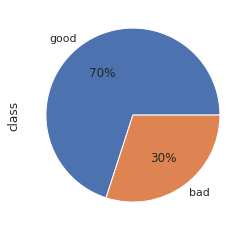

In [8]:
audit_data['class'].value_counts().plot(kind='pie',autopct = "%1.0f%%")

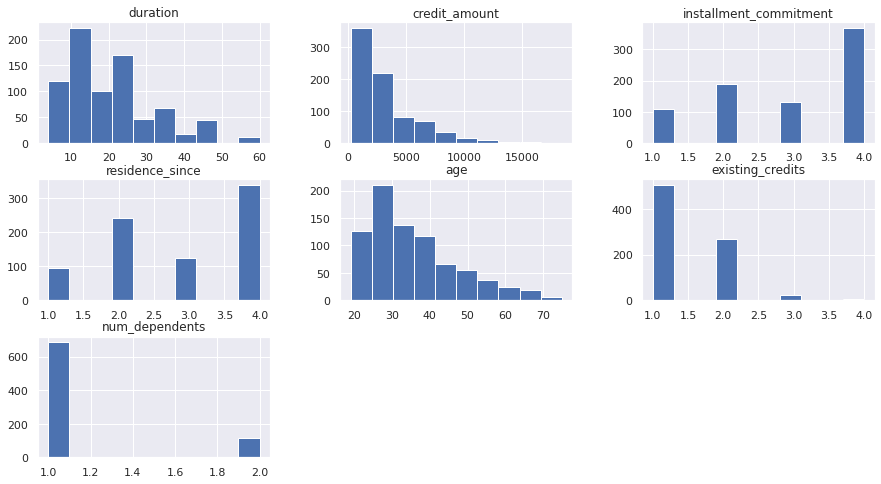

In [9]:
audit_data.hist(figsize=(15,8));


*   Age, credit_amount and duration are positively skewed (we have transform them)
*   Rest of the features are discrete



In [10]:
train_test_data = [audit_data, test_data] # combining train and test dataset

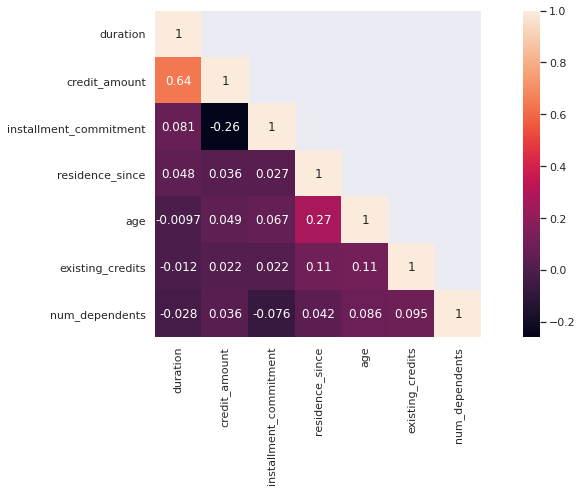

In [11]:
cor_mat = audit_data[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(15,6)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

*   Most of the features correlation coefficient nearly equal to 0
*   Let's perform EDA and Featue Engineering next item



In [12]:
def bar_chart(feature):
    good = audit_data[audit_data['class']=='good'][feature].value_counts()
    bad = audit_data[audit_data['class']=='bad'][feature].value_counts()
    df = pd.DataFrame([good,bad])
    df.index = ['Good','Bad']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

1) checking_status

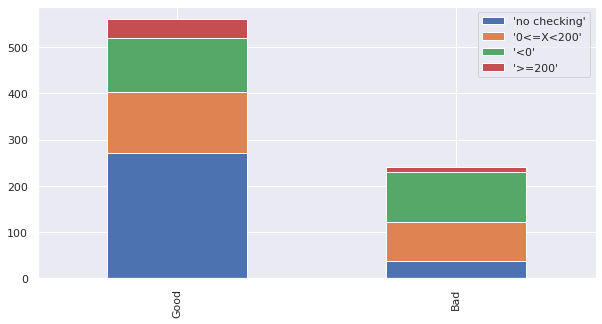

In [13]:
bar_chart('checking_status')

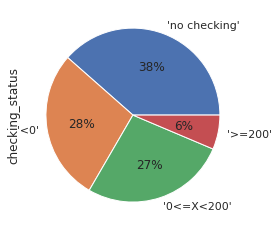

In [14]:
audit_data.checking_status.value_counts().plot(kind='pie',autopct = "%1.0f%%")

Mapping the features to binary

In [15]:
checking_status_map={'\'no checking\'':0,'\'<0\'':1,'\'0<=X<200\'':2,'\'>=200\'':3}
for dataset in train_test_data:
    dataset['checking_status'] = dataset['checking_status'].map(checking_status_map)

2) Duration

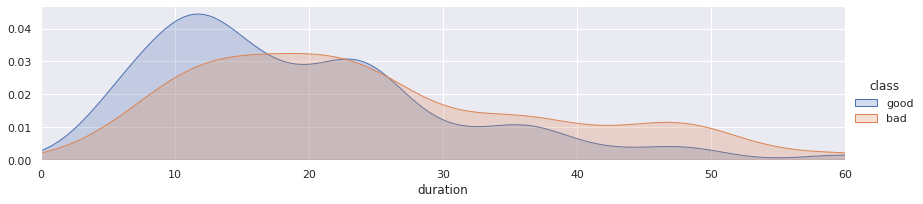

In [16]:
#variation of duartion and class
facet = sns.FacetGrid(audit_data, hue="class",aspect=4)
facet.map(sns.kdeplot,'duration',shade= True)
facet.set(xlim=(0, audit_data['duration'].max()))
facet.add_legend()
 
plt.show()

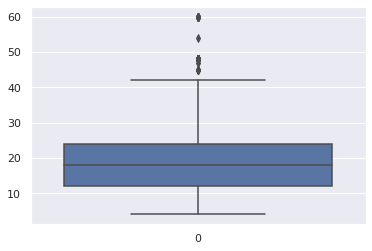

In [17]:
sns.boxplot(data = audit_data['duration'])

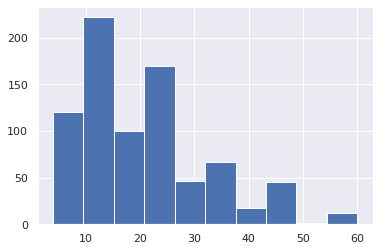

In [18]:
plt.hist(audit_data['duration']);

Handling Extreme outliers

In [19]:
IQR= audit_data.duration.quantile(0.75)-audit_data.duration.quantile(0.25)
upper_brdg= audit_data.duration.quantile(0.75) + 3 * IQR
lowr_brdg = audit_data.duration.quantile(0.25) - 3 * IQR
print(upper_brdg, lowr_brdg)

60.0 -24.0


In [20]:
audit_data.loc[audit_data['duration']>60, 'duration']= 60
test_data.loc[audit_data['duration']>60, 'duration']= 60

Log Transform to handel skewed data

In [21]:
audit_data['duration'] = np.log(audit_data['duration'])
test_data['duration'] = np.log(test_data['duration'])

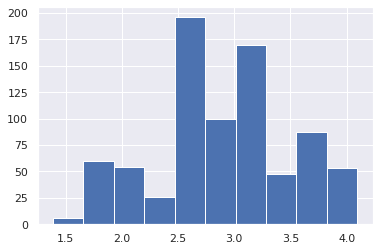

In [22]:
plt.hist(audit_data['duration']);

Credit_history

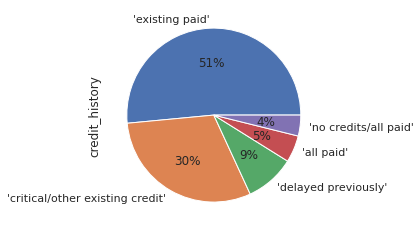

In [23]:
audit_data.credit_history.value_counts().plot(kind='pie',autopct = "%1.0f%%")

We can merge **all paid** and **no credit/all paid**

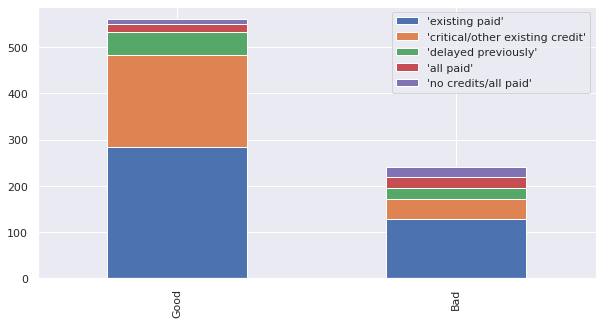

In [24]:
bar_chart('credit_history')

Mapping data to nemeric values

In [25]:
credit_history_map={'\'existing paid\'':0,'\'critical/other existing credit\'':1,'\'delayed previously\'':2,'\'all paid\'':3,'\'no credits/all paid\'':3}
for dataset in train_test_data:
    dataset['credit_history'] = dataset['credit_history'].map(credit_history_map)

In [26]:
audit_data.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,0,2.890372,1,radio/tv,1800,'<100','1<=X<4',4,'male single',none,2,car,24,none,own,2,skilled,1,none,yes,good
1,1,3.178054,0,radio/tv,2439,'<100','<1',4,'female div/dep/mar',none,4,'real estate',35,none,own,1,skilled,1,yes,yes,bad
2,0,3.583519,3,repairs,2613,'<100','1<=X<4',4,'male single',none,2,car,27,none,own,2,skilled,1,none,yes,good
3,0,2.708050,0,education,4623,'100<=X<500','1<=X<4',3,'male single',none,2,'life insurance',40,none,own,1,'high qualif/self emp/mgmt',1,yes,yes,bad
4,1,3.044522,0,furniture/equipment,3599,'<100','4<=X<7',1,'female div/dep/mar',none,4,car,26,none,rent,1,'unskilled resident',1,none,yes,good


Purpose

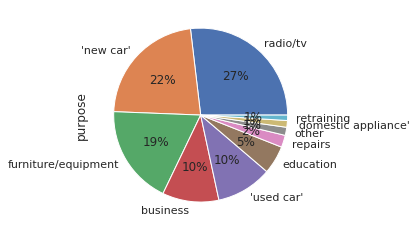

In [27]:
audit_data.purpose.value_counts().plot(kind='pie',autopct = "%1.0f%%")

Many categories are less than 5%, lets merge all of them to **others** while mapping them to numeric values

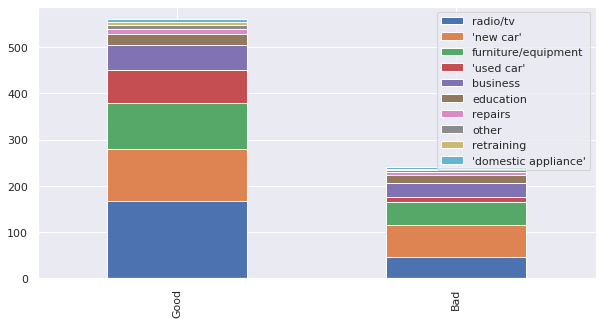

In [28]:
bar_chart('purpose')

In [29]:
purpose_map={'radio/tv':0,'\'new car\'':1,'furniture/equipment':2,'\'used car\'':3,'business':4,'education':5,'repairs':6,'other':6,'retraining':6,'\'domestic appliance\'':6}
for dataset in train_test_data:
    dataset['purpose'] = dataset['purpose'].map(purpose_map)

Saving_status

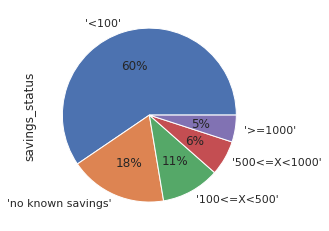

In [30]:
audit_data.savings_status.value_counts().plot(kind='pie',autopct = "%1.0f%%")

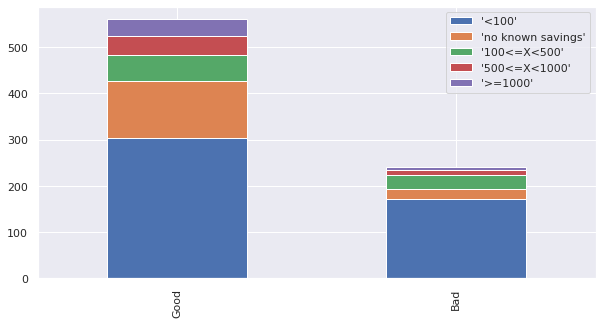

In [31]:
bar_chart('savings_status')

In [32]:
savings_status_map={'\'no known savings\'':0,'\'<100\'':1,'\'100<=X<500\'':2,'\'500<=X<1000\'':3,'\'>=1000\'':4}
for dataset in train_test_data:
    dataset['savings_status'] = dataset['savings_status'].map(savings_status_map)

Installment commitment

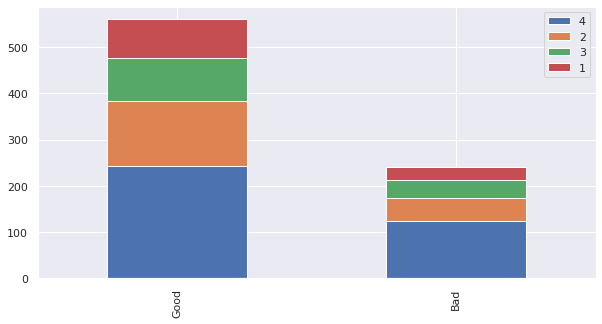

In [33]:
bar_chart('installment_commitment')

Personal status

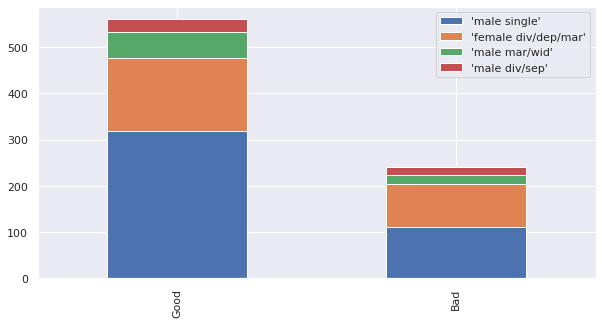

In [34]:
bar_chart('personal_status')

In [35]:
personal_status_map={'\'male single\'':0,'\'female div/dep/mar\'':1,'\'male mar/wid\'':2,'\'male div/sep\'':3}
for dataset in train_test_data:
    dataset['personal_status'] = dataset['personal_status'].map(personal_status_map)

Employment

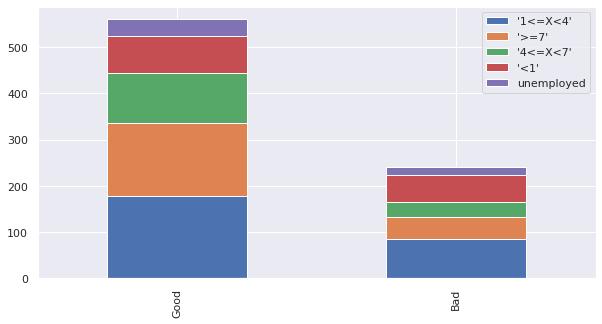

In [36]:
bar_chart('employment')

In [37]:
employment_map={'unemployed':0,'\'<1\'':1,'\'1<=X<4\'':2,'\'4<=X<7\'':3, '\'>=7\'':4}
for dataset in train_test_data:
    dataset['employment'] = dataset['employment'].map(employment_map)

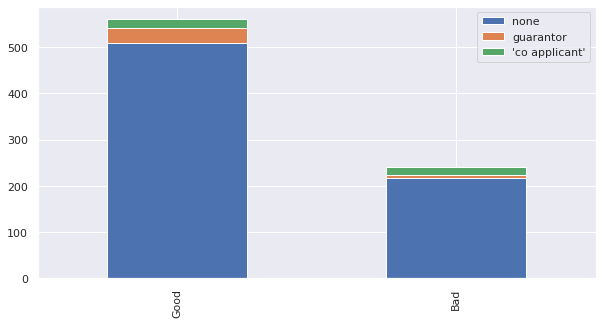

In [38]:
bar_chart('other_parties')        

This feature is highly biased, we can drop it

Resident since

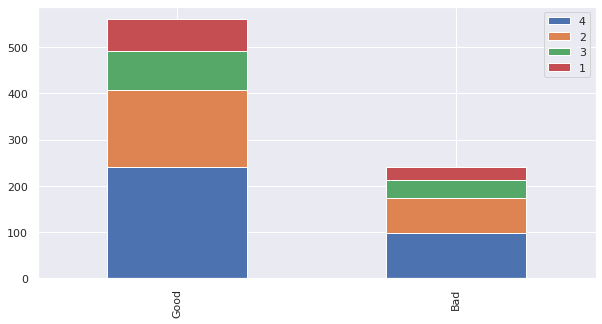

In [39]:
bar_chart('residence_since') 

property magnitude

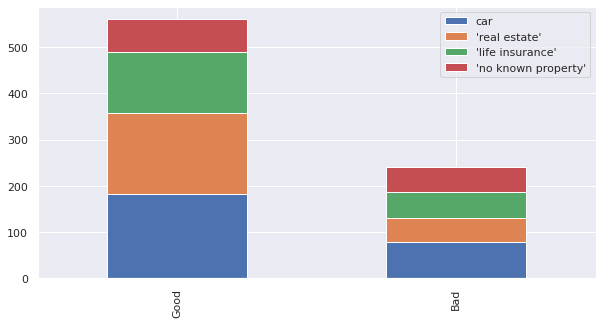

In [40]:
bar_chart('property_magnitude')

In [41]:
property_magnitude_map={'car':0,'\'real estate\'':1,'\'life insurance\'':2,'\'no known property\'':3}
for dataset in train_test_data:
    dataset['property_magnitude'] = dataset['property_magnitude'].map(property_magnitude_map)

Age

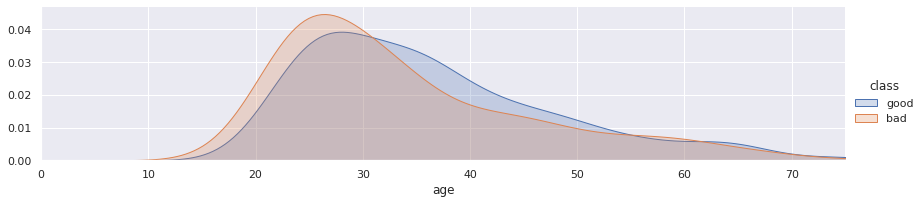

In [42]:
facet = sns.FacetGrid(audit_data, hue="class",aspect=4)
facet.map(sns.kdeplot,'age',shade= True)
facet.set(xlim=(0, audit_data['age'].max()))
facet.add_legend()
 
plt.show()

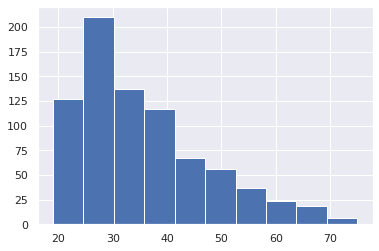

In [43]:
plt.hist(audit_data['age']);

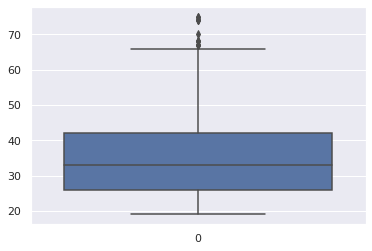

In [44]:
sns.boxplot(data=audit_data['age'])

In [45]:
IQR= audit_data.age.quantile(0.75)-audit_data.age.quantile(0.25)

In [46]:
upper_brdg= audit_data.age.quantile(0.75) + 1.5 * IQR
lowr_brdg = audit_data.age.quantile(0.75) - 1.5 * IQR
print(upper_brdg), print(lowr_brdg)

66.0
18.0


(None, None)

In [47]:
audit_data.loc[audit_data['age']>66, 'age']=66
test_data.loc[audit_data['age']>66, 'age']=66

In [48]:
audit_data['age'] = np.log(audit_data['age'])
test_data['age'] = np.log(test_data['age'])

Other payment plan

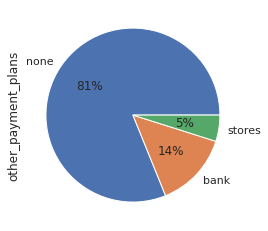

In [49]:
audit_data.other_payment_plans.value_counts().plot(kind='pie',autopct = "%1.0f%%")

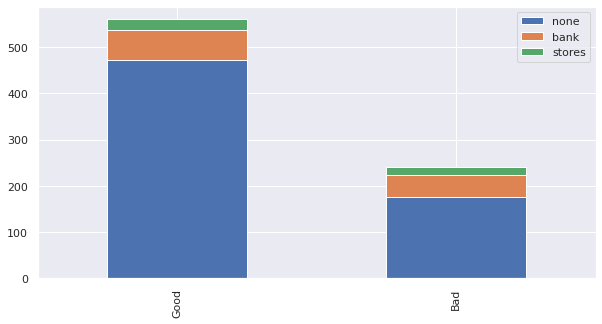

In [50]:
bar_chart('other_payment_plans')

Housing

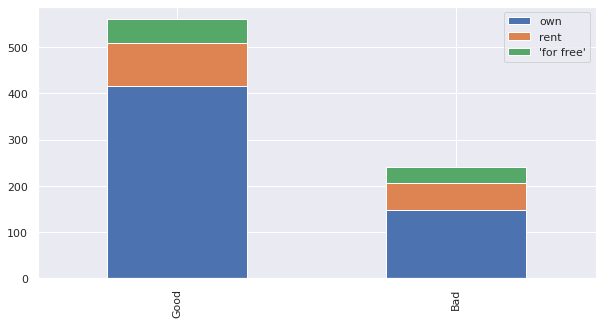

In [51]:
bar_chart('housing')

In [52]:
housing_map={'own':0,'rent':1,'\'for free\'':2}
for dataset in train_test_data:
    dataset['housing'] = dataset['housing'].map(housing_map)

Existing_credits

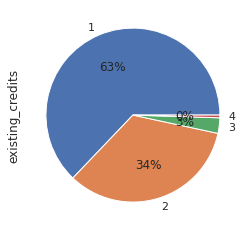

In [53]:
audit_data.existing_credits.value_counts().plot(kind='pie',autopct = "%1.0f%%")

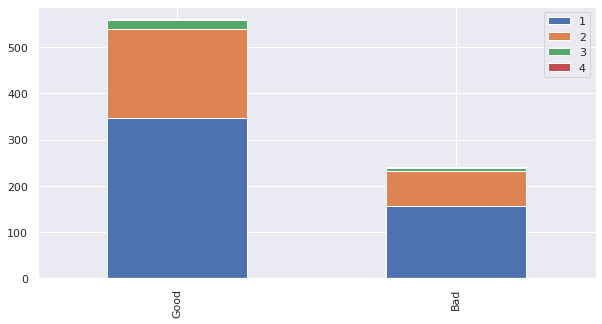

In [54]:
bar_chart('existing_credits')

In [55]:
#merge 3 and 4
credit = [3,4]
for i in credit:
    audit_data['existing_credits'] = np.where(audit_data['existing_credits']==i,3 , audit_data['existing_credits'])
    test_data['existing_credits'] = np.where(test_data['existing_credits']==i,3 , test_data['existing_credits'])

In [56]:
audit_data.existing_credits.value_counts()

1    503
2    270
3     27
Name: existing_credits, dtype: int64

Job

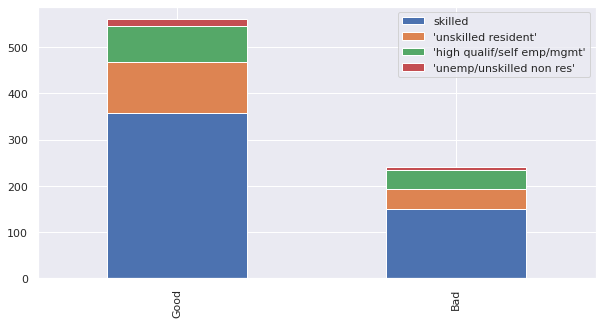

In [57]:
bar_chart('job')

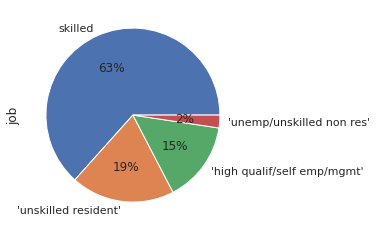

In [58]:
audit_data.job.value_counts().plot(kind='pie',autopct = "%1.0f%%")

In [59]:
job_map={'skilled':0,'\'unskilled resident\'':1,'\'high qualif/self emp/mgmt\'':2,'\'unemp/unskilled non res\'':4}
for dataset in train_test_data:
    dataset['job'] = dataset['job'].map(job_map)

Dependents

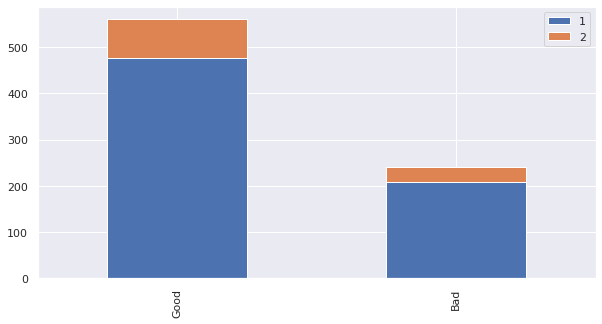

In [60]:
bar_chart('num_dependents')

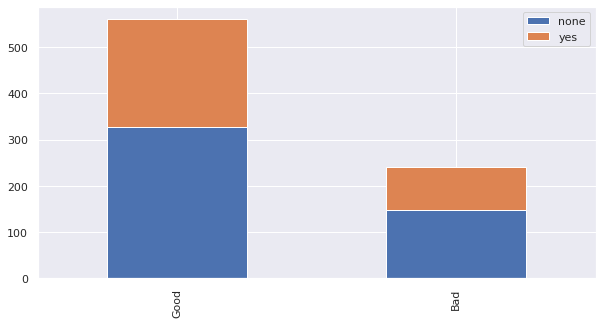

In [61]:
bar_chart('own_telephone')

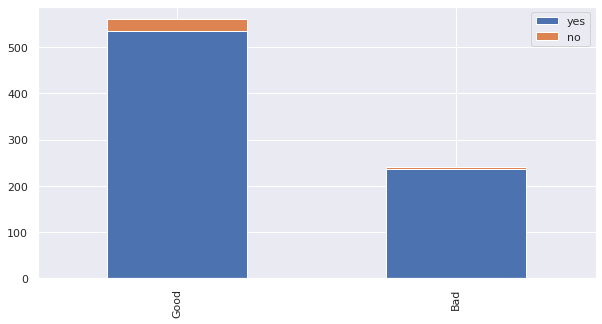

In [62]:
bar_chart('foreign_worker')



*   **Foreign work** data is biased more than 90% values are no
*   **own_telephone** and **num_dependents** will not affect our model that much

We will drop these features



Credit_amount

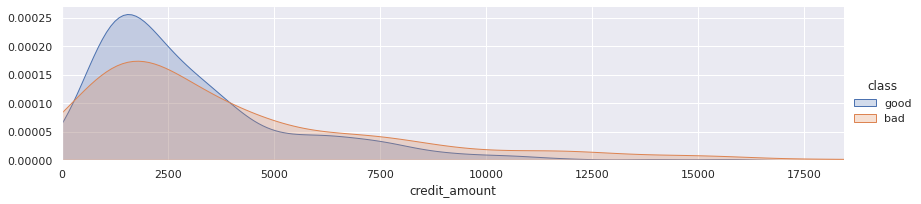

In [63]:
facet = sns.FacetGrid(audit_data, hue="class",aspect=4)
facet.map(sns.kdeplot,'credit_amount',shade= True)
facet.set(xlim=(0, audit_data['credit_amount'].max()))
facet.add_legend()
 
plt.show()

(array([359., 218.,  81.,  70.,  35.,  15.,  11.,   5.,   5.,   1.]),
 array([  250. ,  2067.4,  3884.8,  5702.2,  7519.6,  9337. , 11154.4,
        12971.8, 14789.2, 16606.6, 18424. ]),
 <a list of 10 Patch objects>)

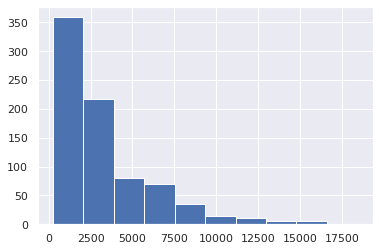

In [64]:
plt.hist(audit_data['credit_amount'])

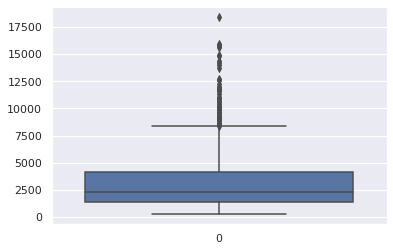

In [65]:
sns.boxplot(data= audit_data['credit_amount'])

In [66]:
IQR= audit_data.credit_amount.quantile(0.75) - audit_data.credit_amount.quantile(0.25)
upper= audit_data.credit_amount.quantile(0.75) + 3*IQR 
lower= audit_data.credit_amount.quantile(0.25)- 3*IQR
print(upper), print(lower)

12572.0
-7042.0


(None, None)

In [67]:
audit_data.loc[audit_data['credit_amount']>12572,'credit_amount']=12572
test_data.loc[audit_data['credit_amount']>12572,'credit_amount']=12572

In [68]:
audit_data['credit_amount'] = np.log(audit_data['credit_amount'])
test_data['credit_amount'] = np.log(test_data['credit_amount'])

Mapping the dependent feature

In [69]:
class_map={'good':1,'bad':0}
audit_data['class'] = audit_data['class'].map(class_map)

In [70]:
audit_data.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,0,2.890372,1,0,7.495542,1,2,4,0,none,2,0,3.178054,none,0,2,0,1,none,yes,1
1,1,3.178054,0,0,7.799343,1,1,4,1,none,4,1,3.555348,none,0,1,0,1,yes,yes,0
2,0,3.583519,3,6,7.868254,1,2,4,0,none,2,0,3.295837,none,0,2,0,1,none,yes,1
3,0,2.708050,0,5,8.438799,2,2,3,0,none,2,2,3.688879,none,0,1,2,1,yes,yes,0
4,1,3.044522,0,2,8.188411,1,3,1,1,none,4,0,3.258097,none,1,1,1,1,none,yes,1


Split the data into X_train and X_test and drop the featuers

In [71]:
target = audit_data['class']
audit_data= audit_data.drop('class', axis=1)
drop_classes=['other_parties','other_payment_plans','own_telephone','foreign_worker','num_dependents']
train = audit_data.drop(drop_classes, axis=1)
test = test_data.drop(drop_classes, axis=1)

train.shape, target.shape


((800, 15), (800,))

In [72]:
train.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job
0,0,2.890372,1,0,7.495542,1,2,4,0,2,0,3.178054,0,2,0
1,1,3.178054,0,0,7.799343,1,1,4,1,4,1,3.555348,0,1,0
2,0,3.583519,3,6,7.868254,1,2,4,0,2,0,3.295837,0,2,0
3,0,2.708050,0,5,8.438799,2,2,3,0,2,2,3.688879,0,1,2
4,1,3.044522,0,2,8.188411,1,3,1,1,4,0,3.258097,1,1,1


In [73]:
test.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job
0,0,2.890372,0,1,7.886833,0,3,4,0,3,2,3.465736,0,1,0
1,0,2.890372,0,0,7.316548,1,2,4,0,2,3,3.465736,2,1,2
2,0,2.484907,2,6,7.349231,4,4,4,0,4,3,4.007333,2,2,0
3,0,2.708050,0,1,8.066521,4,3,2,1,3,0,2.995732,1,1,0
4,1,3.871201,3,3,8.434898,1,4,3,0,4,3,3.178054,2,2,0


Model creation

In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [75]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         800 non-null    int64  
 1   duration                800 non-null    float64
 2   credit_history          800 non-null    int64  
 3   purpose                 800 non-null    int64  
 4   credit_amount           800 non-null    float64
 5   savings_status          800 non-null    int64  
 6   employment              800 non-null    int64  
 7   installment_commitment  800 non-null    int64  
 8   personal_status         800 non-null    int64  
 9   residence_since         800 non-null    int64  
 10  property_magnitude      800 non-null    int64  
 11  age                     800 non-null    float64
 12  housing                 800 non-null    int64  
 13  existing_credits        800 non-null    int64  
 14  job                     800 non-null    in

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.25, random_state=42)

In [77]:
rf = RandomForestClassifier(random_state=42)

# Train Model 
rf.fit(X_train, y_train)

# Prediction on Test set
pred_rf = rf.predict(X_test)

# Accuracy on test set: 
print("Test Accuracy: ", accuracy_score(pred_rf, y_test))

Test Accuracy:  0.745


In [78]:
gb = GradientBoostingClassifier()

# Training model
gb.fit(X_train, y_train)

# Prediction on test set
gb_pred = gb.predict(X_test)

# Accuracy score on Test set
print("Test Accuracy: ", accuracy_score(y_test, gb_pred))

Test Accuracy:  0.74


In [79]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [80]:
print(confusion_matrix(y_test, pred_rf))

[[ 24  39]
 [ 12 125]]


In [81]:
print(confusion_matrix(y_test, gb_pred))

[[ 30  33]
 [ 19 118]]


##Hyperparameter Tuning
Randomized Search CV

In [82]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [83]:
rf1= RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf1,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
rf_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   55.1s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  7.2min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [84]:
rf_randomcv.best_params_

{'criterion': 'gini',
 'max_depth': 780,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 600}

In [85]:
best_random_grid=rf_randomcv.best_estimator_

In [86]:
y_pred=best_random_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))

[[ 24  39]
 [ 15 122]]
Accuracy Score 0.73


Grid Search CV

In [87]:
rf_randomcv.best_params_

{'criterion': 'gini',
 'max_depth': 780,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 600}

In [88]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'], 
                         rf_randomcv.best_params_['min_samples_leaf']+2, 
                         rf_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] - 2,
                          rf_randomcv.best_params_['min_samples_split'] - 1,
                          rf_randomcv.best_params_['min_samples_split'], 
                          rf_randomcv.best_params_['min_samples_split'] +1,
                          rf_randomcv.best_params_['min_samples_split'] + 2],
    'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 200, rf_randomcv.best_params_['n_estimators'] - 100, 
                     rf_randomcv.best_params_['n_estimators'], 
                     rf_randomcv.best_params_['n_estimators'] + 100, rf_randomcv.best_params_['n_estimators'] + 200]
}

print(param_grid)

{'criterion': ['gini'], 'max_depth': [780], 'max_features': ['sqrt'], 'min_samples_leaf': [1, 3, 5], 'min_samples_split': [3, 4, 5, 6, 7], 'n_estimators': [400, 500, 600, 700, 800]}


In [89]:
rf=RandomForestClassifier()
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 75 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   28.1s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:  9.9min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [90]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=780, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [91]:
best_grid=grid_search.best_estimator_

In [92]:
y_pred=best_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))

[[ 23  40]
 [ 10 127]]
Accuracy Score 0.75


In [93]:
test_rf_pred = best_grid.predict(test)

In [94]:
output_rf = pd.DataFrame({
        "prediction":  test_rf_pred
    })


In [95]:
rf_output=output_rf.prediction.map(lambda x: 'good' if x==1 else 'bad')


In [96]:
rf_output.to_csv('/content/drive/My Drive/Colab Notebooks/bank_loan_problem/RF_prediction.csv', index=False)
#gb_output.to_csv('/content/drive/My Drive/Colab Notebooks/bank_loan_problem/GB_prediction.csv', index=False)

In [99]:
best_grid.feature_importances_

array([0.1137354 , 0.1148259 , 0.05447132, 0.06196705, 0.14513958,
       0.05046213, 0.06186356, 0.0480986 , 0.04142531, 0.04226473,
       0.04960082, 0.12763205, 0.02695397, 0.02791632, 0.03364324])


*   Test set score (RF)= 77.5
*   Test set score (GB)= 80


